In [34]:
pip install wfdb

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install hrv-analysis

   ---------------------------------------- 0.0/225.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/225.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/225.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/225.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/225.1 kB ? eta -:--:--
   ----- --------------------------------- 30.7/225.1 kB 145.2 kB/s eta 0:00:02
   ----- --------------------------------- 30.7/225.1 kB 145.2 kB/s eta 0:00:02
   ------- ------------------------------- 41.0/225.1 kB 140.3 kB/s eta 0:00:02
   ------- ------------------------------- 41.0/225.1 kB 140.3 kB/s eta 0:00:02
   ------- ------------------------------- 41.0/225.1 kB 140.3 kB/s eta 0:00:02
   ---------- ---------------------------- 61.4/225.1 kB 156.1 kB/s eta 0:00:02
   ---------- ---------------------------- 61.4/225.1 kB 156.1 kB/s eta 0:00:02
   ------------ -------------------------- 71.7/225.1 kB 151.3 kB/s eta 0:00:02
  

In [70]:
import os
import wfdb
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pywt
from tqdm import tqdm  # 导入 tqdm
from scipy.signal import find_peaks, medfilt
from numpy import trapz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [106]:
def read_bindata(file_path):
    """读取.bin文件并返回ECG数据"""
    with open(file_path, 'rb') as fidin:
        # 跳过文件头部的非数据部分，根据MATLAB代码，数据从第529个字节开始
        fidin.seek(528)
        # 读取数据部分
        data_raw = fidin.read()
    
    # 根据MATLAB代码，每个数据点由两个字节组成
    data = np.frombuffer(data_raw, dtype=np.uint16)
    
    # 截取前500000个数据点
    data_500000 = data[:500000]
    
    return data_500000

def process_ecg_data(base_path, output_file, label):
    """处理ECG数据并保存到一个.pkl文件中，同时添加标签"""
    all_data = {}
    # 遍历所有被试文件夹
    #for subject in range(1, 90):  # 被试编号从001到089
    for subject in range(1,462): #使用老师的数据集时需要修改
        #subject_folder = f"{subject:03d}"  # 格式化编号为三位数，例如001
        #使用老师给的数据集时需要格式化为4位数
        subject_folder = f"{subject:04d}"  # 格式化编号为三位数，例如001
        subject_path = os.path.join(base_path, subject_folder)
        print(subject_path)
        # 检查被试文件夹是否存在
        if not os.path.isdir(subject_path):
            print(f"被试文件夹 {subject_folder} 不存在，跳过。")
            continue
        
        # 获取.bin文件路径
        bin_files = [f for f in os.listdir(subject_path) if f.endswith('.bin')]
        if not bin_files:
            print(f"被试 {subject_folder} 中没有.bin文件，跳过。")
            continue
        
        bin_file_path = os.path.join(subject_path, bin_files[0])
        
        # 读取并处理数据
        ecg_data = read_bindata(bin_file_path)
        
        # 保存到字典中，并添加标签
        all_data[subject_folder] = {'data': ecg_data, 'label': label}
    
    # 将所有数据保存到.pkl文件
    with open(output_file, 'wb') as f:
        pickle.dump(all_data, f)
    
    print(f"所有数据已保存到 {output_file}")
'''
# 设置基础路径和输出文件名,本段尝试实验数据的使用
base_path_positive = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_experiment\\positive'
output_file_positive = 'ecg_data_500000_positive_experiment.pkl'

process_ecg_data(base_path_positive, output_file_positive, label=1)

base_path_negative = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_experiment\\negative'
output_file_negative = 'ecg_data_500000_negative_experiment.pkl'
process_ecg_data(base_path_negative, output_file_negative, label=0)
'''
'''
# 设置基础路径和输出文件名,本文件尝试睡眠数据的使用
base_path_positive = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_sleep\\positive'
output_file_positive = 'ecg_data_500000_positive_sleep.pkl'

process_ecg_data(base_path_positive, output_file_positive, label=1)

base_path_negative = 'Y:\\生物医学信号处理\\project\\vn5nknh3mn-2\\all_data\\ECG_sleep\\negative'
output_file_negative = 'ecg_data_500000_negative_sleep.pkl'
process_ecg_data(base_path_negative, output_file_negative, label=0)
'''

# 设置基础路径和输出文件名,本文件尝试老师给的数据的使用
base_path_positive = 'Y:\\生物医学信号处理\\project\\teachersd\\bindata\\positive1'
output_file_positive = 'ecg_data_500000_positive_teacher.pkl'

process_ecg_data(base_path_positive, output_file_positive, label=1)

base_path_negative = 'Y:\\生物医学信号处理\\project\\teachersd\\bindata\\negative1'
output_file_negative = 'ecg_data_500000_negative_teacher.pkl'
process_ecg_data(base_path_negative, output_file_negative, label=0)


Y:\生物医学信号处理\project\teachersd\bindata\positive1\0001
被试文件夹 0001 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0002
被试文件夹 0002 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0003
被试文件夹 0003 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0004
被试文件夹 0004 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0005
被试文件夹 0005 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0006
被试文件夹 0006 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0007
被试文件夹 0007 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0008
被试文件夹 0008 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0009
被试文件夹 0009 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0010
被试文件夹 0010 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0011
被试文件夹 0011 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0012
被试文件夹 0012 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0013
被试文件夹 0013 不存在，跳过。
Y:\生物医学信号处理\project\teachersd\bindata\positive1\0014
被试文件夹 0014 

In [108]:
    #重启内核后加载数据,如果下载了数据集文件即.pkl文件，并且数据集文件和.ipynb放在同一个文件夹里，那么在运行了import那一坨代码之后直接运行这个就可以了
    import pickle
    
    # 加载 P_data
    #with open('ecg_data_500000_positive1.pkl', 'rb') as f:
    #    P_data = pickle.load(f)
    
    # 加载 N_data
    #with open('ecg_data_500000_negative1.pkl', 'rb') as f:
    #    N_data = pickle.load(f)
'''
#sleep数据处理
# 加载 P_data
    with open('ecg_data_500000_positive_sleep.pkl', 'rb') as f:
        P_data = pickle.load(f)
    
    # 加载 N_data
    with open('ecg_data_500000_negative_sleep.pkl', 'rb') as f:
        N_data = pickle.load(f)
'''
'''
#experiment数据处理
# 加载 P_data
    with open('ecg_data_500000_positive_experiment.pkl', 'rb') as f:
        P_data = pickle.load(f)
    
    # 加载 N_data
    with open('ecg_data_500000_negative_experiment.pkl', 'rb') as f:
        N_data = pickle.load(f)
'''

#teacher数据处理
# 加载 P_data
    with open('ecg_data_500000_positive_teacher.pkl', 'rb') as f:
        P_data = pickle.load(f)
    
    # 加载 N_data
    with open('ecg_data_500000_negative_teacher.pkl', 'rb') as f:
        N_data = pickle.load(f)

    print(f"P_data 中的 DataFrame 数量: {len(P_data)}")
    print(f"N_data 中的 DataFrame 数量: {len(N_data)}")

P_data 中的 DataFrame 数量: 15
N_data 中的 DataFrame 数量: 76


In [5]:
import numpy as np
from scipy.signal import savgol_filter

# 初始化用于保存滤波后的数据的列表
P_data_SG = []
N_data_SG = []

# 遍历所有 P_data 进行滤波
for subject, data_dict in P_data.items():
    # 获取实际的数据
    data = data_dict['data']
    # 对 y_values 进行 Savitzky-Golay 滤波，窗口长度为11，多项式度数为3
    filtered_y_values = savgol_filter(data, window_length=11, polyorder=3)
    # 将滤波后的结果存储在列表中
    P_data_SG.append(filtered_y_values)

# 遍历所有 N_data 进行滤波
for subject, data_dict in N_data.items():
    # 获取实际的数据
    data = data_dict['data']
    # 对 y_values 进行 Savitzky-Golay 滤波，窗口长度为11，多项式度数为3
    filtered_y_values = savgol_filter(data, window_length=11, polyorder=3)
    # 将滤波后的结果存储在列表中
    N_data_SG.append(filtered_y_values)
print('滤波成功1')
# 现在 P_data_SG 和 N_data_SG 中保存了滤波后的数值数组

滤波成功1


In [110]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.signal import savgol_filter

# 采样率
fs = 512  
# 工频干扰对应的频率索引（50Hz对应的离散频率索引）
freq_index_50Hz = int(50 * len(P_data[list(P_data.keys())[0]]['data']) / fs)  

# 初始化用于保存滤波后的数据的列表
P_data_SG = []
N_data_SG = []

# 遍历所有P_data进行滤波，先去除50Hz干扰，再进行Savitzky-Golay滤波
for subject, data_dict in P_data.items():
    # 获取实际的数据
    data = data_dict['data']
    # 进行傅里叶变换
    fft_data = fft(data)
    # 将50Hz对应的频率成分置零（去除50Hz干扰）
    fft_data[freq_index_50Hz] = 0
    fft_data[-freq_index_50Hz] = 0
    # 进行傅里叶逆变换，还原信号
    data_after_50Hz_filter = np.real(ifft(fft_data))
    # 对去除50Hz干扰后的信号进行Savitzky-Golay滤波，窗口长度为11，多项式度数为3
    filtered_y_values = savgol_filter(data_after_50Hz_filter, window_length=11, polyorder=3)
    # 将滤波后的结果存储在列表中
    P_data_SG.append(filtered_y_values)

# 遍历所有N_data进行滤波，先去除50Hz干扰，再进行Savitzky-Golay滤波
for subject, data_dict in N_data.items():
    # 获取实际的数据
    data = data_dict['data']
    # 进行傅里叶变换
    fft_data = fft(data)
    # 将50Hz对应的频率成分置零（去除50Hz干扰）
    fft_data[freq_index_50Hz] = 0
    fft_data[-freq_index_50Hz] = 0
    # 进行傅里叶逆变换，还原信号
    data_after_50Hz_filter = np.real(ifft(fft_data))
    # 对去除50Hz干扰后的信号进行Savitzky-Golay滤波，窗口长度为11，多项式度数为3
    filtered_y_values = savgol_filter(data_after_50Hz_filter, window_length=11, polyorder=3)
    # 将滤波后的结果存储在列表中
    N_data_SG.append(filtered_y_values)

print('滤波成功1')
# 现在P_data_SG和N_data_SG中保存了滤波后的数值数组

滤波成功1


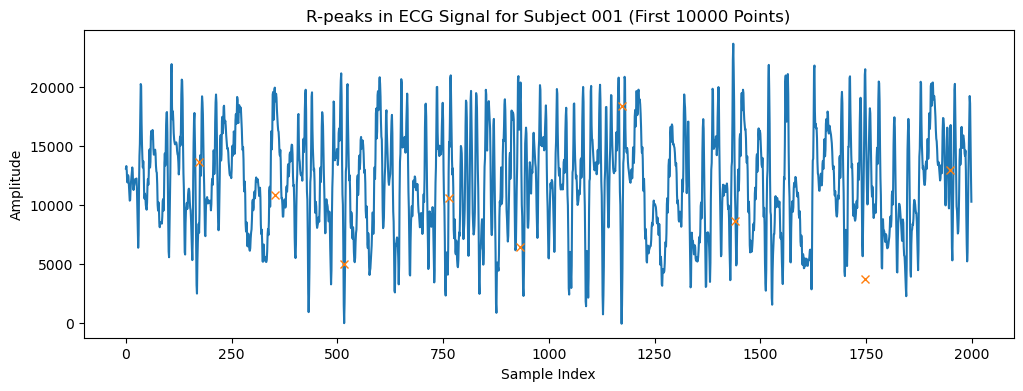

Heart Rate: 144.99 bpm
Heart Rate Variability: 0.10 seconds


In [114]:
#可视化检修模块-Positive
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks

# 假设 P_data_SG 和 N_data_SG 已经是滤波后的数据列表
# P_data_SG[0] 和 N_data_SG[0] 分别是正类和负类1号被试的滤波后数据

# 绘制1号被试滤波后的数据（前8000个点）
def plot_ecg(data, title="ECG Data"):
    plt.figure(figsize=(12, 4))
    plt.plot(data[0:10000])  # 修改为只绘制前8000个点
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

# 基线漂移校正函数
def correct_baseline(data, wavelet='db4', level=1):
    # 使用小波变换进行基线估计
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # 将最后一个系数（近似系数，即基线）设置为0
    coeffs[-1] *= 0
    # 重构信号
    corrected_data = pywt.waverec(coeffs, wavelet)
    # 确保校正后的数据长度与原始数据相同
    if len(corrected_data) > len(data):
        corrected_data = corrected_data[:len(data)]
    return corrected_data

# 对对应编号被试的ECG数据进行基线校正
data_number=3 #被试编号
P_data_corrected = correct_baseline(P_data_SG[data_number])

# 对1号被试基线校正后的数据进行绘图（前8000个点）
#plot_ecg(P_data_corrected, "Baseline Corrected ECG Data for Subject 001 (First 8000 Points)")

# Pan-Tompkins算法检测R波
def detect_r_peaks(ecg_signal, sampling_rate=512):
    # 使用Pan-Tompkins算法参数
    diff_signal = np.diff(ecg_signal)
    squared_signal = diff_signal ** 2
    integrated_signal = np.convolve(squared_signal, np.ones(30), mode='same')
    peaks, _ = find_peaks(integrated_signal, distance=sampling_rate * 0.3, height=0.1 * np.max(integrated_signal))
    return peaks
# 定义检测区间
detect_start_point=10000
detect_end_point=12000
# 检测对应被试的R波
r_peaks = detect_r_peaks(P_data_corrected[detect_start_point:detect_end_point])
sampling_rate=512

# 绘制1号被试的前10000个数据点，并标出R波峰值
plt.figure(figsize=(12, 4))
plt.plot(P_data_corrected[detect_start_point:detect_end_point])
plt.plot(r_peaks, P_data_corrected[r_peaks], "x")
plt.title("R-peaks in ECG Signal for Subject 001 (First 10000 Points)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# 计算心率和心率变异性指标
rr_intervals = np.diff(r_peaks) / sampling_rate  # RR间期，单位为秒
heart_rate = 60 / rr_intervals  # 心率，单位为bpm
heart_rate_variability = np.std(rr_intervals)  # 心率变异性

print(f"Heart Rate: {np.mean(heart_rate):.2f} bpm")
print(f"Heart Rate Variability: {heart_rate_variability:.2f} seconds")

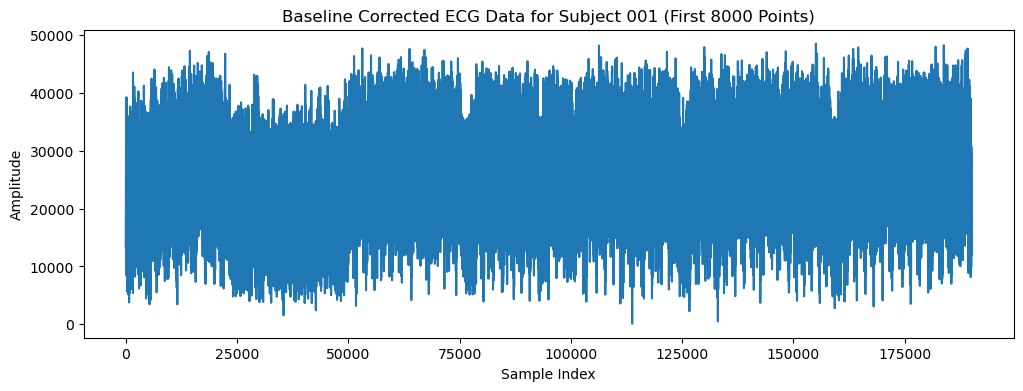

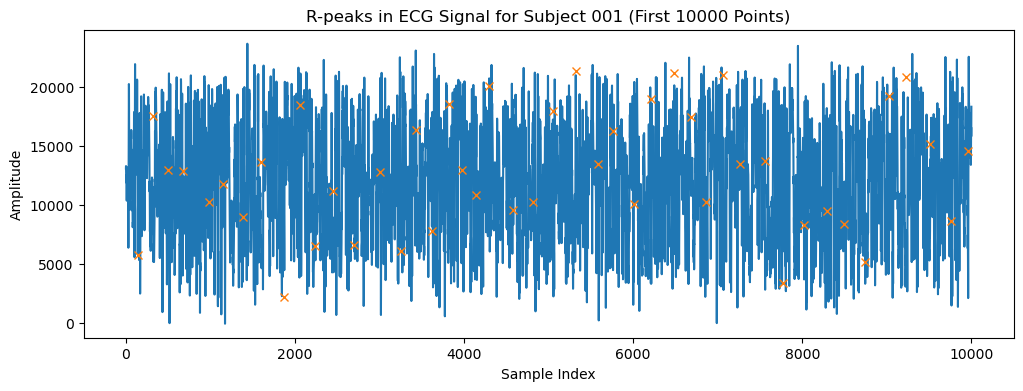

Heart Rate: 143.08 bpm
Heart Rate Variability: 0.09 seconds


In [116]:
#可视化检修模块-Negative
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks

# 假设 P_data_SG 和 N_data_SG 已经是滤波后的数据列表
# P_data_SG[0] 和 N_data_SG[0] 分别是正类和负类1号被试的滤波后数据

# 绘制1号被试滤波后的数据（前8000个点）
def plot_ecg(data, title="ECG Data"):
    plt.figure(figsize=(12, 4))
    plt.plot(data[10000:200000])  # 修改为只绘制前8000个点
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

# 基线漂移校正函数
def correct_baseline(data, wavelet='db4', level=1):
    # 使用小波变换进行基线估计
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # 将最后一个系数（近似系数，即基线）设置为0
    coeffs[-1] *= 0
    # 重构信号
    corrected_data = pywt.waverec(coeffs, wavelet)
    # 确保校正后的数据长度与原始数据相同
    if len(corrected_data) > len(data):
        corrected_data = corrected_data[:len(data)]
    return corrected_data

# 对对应编号被试的ECG数据进行基线校正
data_number=3 #被试编号
N_data_corrected = correct_baseline(N_data_SG[data_number])

# 对1号被试基线校正后的数据进行绘图（前8000个点）
plot_ecg(N_data_corrected, "Baseline Corrected ECG Data for Subject 001 (First 8000 Points)")

# Pan-Tompkins算法检测R波
def detect_r_peaks(ecg_signal, sampling_rate=512):
    # 使用Pan-Tompkins算法参数
    diff_signal = np.diff(ecg_signal)
    squared_signal = diff_signal ** 2
    integrated_signal = np.convolve(squared_signal, np.ones(30), mode='same')
    peaks, _ = find_peaks(integrated_signal, distance=sampling_rate * 0.3, height=0.1 * np.max(integrated_signal))
    return peaks
# 定义检测区间
detect_start_point=10000
detect_end_point=20000
correct_cut_data=N_data_corrected[detect_start_point:detect_end_point]
# 检测对应被试的R波
r_peaks = detect_r_peaks(correct_cut_data)
sampling_rate=512

# 绘制1号被试的前10000个数据点，并标出R波峰值
plt.figure(figsize=(12, 4))
plt.plot(P_data_corrected[detect_start_point:detect_end_point])
plt.plot(r_peaks, P_data_corrected[r_peaks], "x")
plt.title("R-peaks in ECG Signal for Subject 001 (First 10000 Points)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# 计算心率和心率变异性指标
rr_intervals = np.diff(r_peaks) / sampling_rate  # RR间期，单位为秒
heart_rate = 60 / rr_intervals  # 心率，单位为bpm
heart_rate_variability = np.std(rr_intervals)  # 心率变异性

print(f"Heart Rate: {np.mean(heart_rate):.2f} bpm")
print(f"Heart Rate Variability: {heart_rate_variability:.2f} seconds")

In [131]:
import numpy as np
import pickle
import pywt
from scipy.signal import find_peaks, savgol_filter
from scipy.fftpack import fft, fftfreq

# 基线漂移校正函数
def correct_baseline(data, wavelet='db4', level=1):
    # 使用小波变换进行基线估计
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # 将最后一个系数（近似系数，即基线）设置为0
    coeffs[-1] *= 0
    # 重构信号
    corrected_data = pywt.waverec(coeffs, wavelet)
    # 确保校正后的数据长度与原始数据相同
    if len(corrected_data) > len(data):
        corrected_data = corrected_data[:len(data)]
    return corrected_data


# Pan-Tompkins算法检测R波
def detect_r_peaks(ecg_signal, sampling_rate=512):
    # 使用Pan-Tompkins算法参数
    diff_signal = np.diff(ecg_signal)
    squared_signal = diff_signal ** 2
    integrated_signal = np.convolve(squared_signal, np.ones(30), mode='same')
    peaks, _ = find_peaks(integrated_signal, distance=sampling_rate * 0.3, height=0.1 * np.max(integrated_signal))
    return peaks


# 计算心率和心率变异性指标
def calculate_hr_hrv(r_peaks, sampling_rate=512):
    rr_intervals = np.diff(r_peaks) / sampling_rate  # RR间期，单位为秒
    heart_rate = 60 / rr_intervals  # 心率，单位为bpm
    heart_rate_variability = np.std(rr_intervals)  # 心率变异性
    return np.mean(heart_rate), heart_rate_variability


# 利用小波变换提取Q波起点和T波终点（此处为简单示例，实际可能需更精细调整参数及逻辑）
def detect_qt_wavelets(ecg_signal, sampling_rate=512):
    # 进行小波变换，这里以'db4'小波为例，可根据实际情况调整
    coeffs = pywt.wavedec(ecg_signal, 'db4', level=5)
    # 这里假设Q波起点和T波终点可以通过合适的小波系数特征来确定（实际中可能需要更多先验知识和调试）
    # 示例中简单取某个系数层上的局部极值点作为近似的Q波起点和T波终点，仅为示意，需完善
    cD3 = coeffs[3]
    q_peaks, _ = find_peaks(-np.abs(cD3), distance=sampling_rate * 0.1)  # 找Q波起点近似位置（简单取负绝对值的峰值）
    t_peaks, _ = find_peaks(np.abs(cD3), distance=sampling_rate * 0.1)  # 找T波终点近似位置（取绝对值的峰值）
    if q_peaks.size > 0 and t_peaks.size > 0:
        return q_peaks[0], t_peaks[0]  # 返回第一个找到的Q波起点和T波终点，需改进逻辑以适应多峰等情况
    else:
        return None, None


# 计算Q-T间期长度（单位：秒）
def calculate_qt_interval(q_peak, t_peak, sampling_rate=512):
    if q_peak is not None and t_peak is not None:
        return (t_peak - q_peak) / sampling_rate
    return None


# 根据Bazetts公式计算QTc间期（这里假设RR_interval已知，示例中暂用固定值替代，实际需结合RR计算）
def calculate_qtc_interval(qt_interval, rr_interval):
    if qt_interval is not None:
        return qt_interval / np.sqrt(rr_interval)
    return None


# 计算QT离散度（简单示例，基于多周期的Q-T间期标准差，实际可能需更复杂处理）
def calculate_qt_dispersion(qt_intervals):
    if len(qt_intervals) > 0:
        return np.std(qt_intervals)
    return None


# 计算傅里叶变换结果的指定数量最大峰的相关特征（峰值位置、峰高和峰面积），按照峰值从大到小排序
def extract_fourier_features(ecg_signal, num_peaks=60):
    """
    提取傅里叶变换结果的相关特征，并按峰值大小降序排列。
    :param ecg_signal: 心电信号数据
    :param num_peaks: 要提取的最大峰的数量
    :return: 包含按峰值从大到小排序后的峰值位置、峰高和峰面积的特征列表
    """
    n = len(ecg_signal)
    yf = fft(ecg_signal)
    xf = fftfreq(n, d=1 / 512)[:n // 2]  # 假设采样率为512，根据实际情况调整

    # 获取幅度谱（取绝对值并归一化，这里简单除以点数n，可根据实际调整归一化方式）
    magnitudes = np.abs(yf[:n // 2]) / n

    peak_indices = np.argsort(magnitudes)[::-1][:num_peaks]  # 获取幅度谱中最大峰的索引

    # 根据峰值大小对索引进行降序排序
    sorted_indices = np.argsort(magnitudes[peak_indices])[::-1]
    peak_indices = peak_indices[sorted_indices]

    peak_positions = xf[peak_indices]
    peak_heights = magnitudes[peak_indices]

    peak_areas = []
    for idx in peak_indices:
        # 计算峰面积（简单用矩形法近似，实际可采用更精确积分方法）
        peak_area = np.sum(magnitudes[max(0, idx - 10):min(n // 2, idx + 10)])  # 取峰附近一定范围求和近似面积
        peak_areas.append(peak_area)

    return np.concatenate([peak_positions, peak_heights, np.array(peak_areas)])


# 剪切的起始和终止点
cut_start = 10000
cut_end = 20000

# 第一步：进行基线校正并整合数据
corrected_data_collection_P = []
corrected_data_collection_N = []
for subject, data_dict in P_data.items():
    # 获取实际的数据
    data = data_dict['data']
    data_cut = data[cut_start:cut_end]
    # 基线校正
    corrected_data = correct_baseline(data_cut)
    corrected_data_collection_P.append(corrected_data)

for subject, data_dict in N_data.items():
    # 获取实际的数据
    data = data_dict['data']
    data_cut = data[cut_start:cut_end]
    # 基线校正
    corrected_data = correct_baseline(data_cut)
    corrected_data_collection_N.append(corrected_data)

# 第二步：基于校正后的数据进行后续处理
P_features_matrix = []
N_features_matrix = []
abandon_matrix = []

# 处理阳性数据（P_data对应的校正后的数据）
for corrected_data in corrected_data_collection_P:
    # 峰值提取
    max_value = max(corrected_data)
    min_value = min(corrected_data)
    # R波检测
    r_peaks = detect_r_peaks(corrected_data)
    # 心率和心率变异性计算
    heart_rate, heart_rate_variability = calculate_hr_hrv(r_peaks)

    qt_intervals = []
    for peak_idx in range(len(r_peaks) - 1):
        # 提取Q波起点和T波终点
        q_peak, t_peak = detect_qt_wavelets(corrected_data[r_peaks[peak_idx]:r_peaks[peak_idx + 1]])
        if q_peak is not None and t_peak is not None:
            q_peak += r_peaks[peak_idx]  # 转换为在原始校正后信号中的绝对位置
            t_peak += r_peaks[peak_idx]
            # 计算Q-T间期长度
            qt_interval = calculate_qt_interval(q_peak, t_peak)
            if qt_interval is not None:
                qt_intervals.append(qt_interval)

    if qt_intervals:
        # 计算平均Q-T间期用于QTc计算（这里简单取平均，实际可按更合理方式结合RR等）
        mean_qt_interval = np.mean(qt_intervals)
        # 计算QTc间期（假设RR_interval固定，实际需正确传入对应RR值）
        qtc_interval = calculate_qtc_interval(mean_qt_interval, 1)  # 此处RR_interval暂设为1，需修改为真实值
        qtc_interval = abs(qtc_interval) if qtc_interval is not None else None
        # 计算QT离散度
        qt_dispersion = calculate_qt_dispersion(qt_intervals)

        # 提取傅里叶变换特征
        fourier_features = extract_fourier_features(corrected_data)

        if (heart_rate_variability >= 0 and heart_rate_variability <= 1):
            # 格式化打印结果，对可能为None的值单独处理格式
            qtc_interval_str = "{:.2f}".format(qtc_interval) if qtc_interval is not None else "N/A"
            qt_dispersion_str = "{:.2f}".format(qt_dispersion) if qt_dispersion is not None else "N/A"
            print(f"Subject: Heart Rate: {heart_rate:.2f} bpm, Heart Rate Variability: {heart_rate_variability:.2f} seconds, QTc Interval: {qtc_interval_str}, QT Dispersion: {qt_dispersion_str}")
            # 添加到特征矩阵，包含原有的6个特征以及新提取的9个傅里叶变换特征
            P_features_matrix.append([heart_rate, heart_rate_variability, qtc_interval, qt_dispersion, min_value, max_value] + fourier_features.tolist())
        else:
            print(f"某被试心率变异性异常，对该被试予以舍弃")
            # 添加到删除矩阵
            abandon_matrix.append([subject])
    else:
        print(f"某被试Q-T间期数据获取异常，对该被试予以舍弃")
        abandon_matrix.append([subject])

# 处理阴性数据（N_data对应的校正后的数据）
for corrected_data in corrected_data_collection_N:
    # 峰值提取
    max_value = max(corrected_data)
    min_value = min(corrected_data)
    # R波检测
    r_peaks = detect_r_peaks(corrected_data)
    # 心率和心率变异性计算
    heart_rate, heart_rate_variability = calculate_hr_hrv(r_peaks)

    qt_intervals = []
    for peak_idx in range(len(r_peaks) - 1):
        # 提取Q波起点和T波终点
        q_peak, t_peak = detect_qt_wavelets(corrected_data[r_peaks[peak_idx]:r_peaks[peak_idx + 1]])
        if q_peak is not None and t_peak is not None:
            q_peak += r_peaks[peak_idx]  # 转换为在原始校正后信号中的绝对位置
            t_peak += r_peaks[peak_idx]
            # 计算Q-T间期长度
            qt_interval = calculate_qt_interval(q_peak, t_peak)
            if qt_interval is not None:
                qt_intervals.append(qt_interval)

    if qt_intervals:
        # 计算平均Q-T间期用于QTc计算（这里简单取平均，实际可按更合理方式结合RR等）
        mean_qt_interval = np.mean(qt_intervals)
        # 计算QTc间期（假设RR_interval固定，实际需正确传入对应RR值）
        qtc_interval = calculate_qtc_interval(mean_qt_interval, 1)  # 此处RR_interval暂设为1，需修改为真实值
        qtc_interval = abs(qtc_interval) if qtc_interval is not None else None
        # 计算QT离散度
        qt_dispersion = calculate_qt_dispersion(qt_intervals)

        # 提取傅里叶变换特征
        fourier_features = extract_fourier_features(corrected_data)

        if (heart_rate_variability >= 0 and heart_rate_variability <= 0.3):
            # 格式化打印结果，对可能为None的值单独处理格式
            qtc_interval_str = "{:.2f}".format(qtc_interval) if qtc_interval is not None else "N/A"
            qt_dispersion_str = "{:.2f}".format(qt_dispersion) if qt_dispersion is not None else "N/A"
            print(f"Subject: Heart Rate: {heart_rate:.2f} bpm, Heart Rate Variability: {heart_rate_variability:.2f} seconds, QTc Interval: {qtc_interval_str}, QT Dispersion: {qt_dispersion_str},min value:{min_value:.2f},max value:{max_value:.2f}")
            # 添加到特征矩阵，包含原有的6个特征以及新提取的9个傅里叶变换特征
            N_features_matrix.append([heart_rate, heart_rate_variability, qtc_interval, qt_dispersion, min_value, max_value] + fourier_features.tolist())
        else:
            print(f"某被试心率变异性异常，对该被试予以舍弃")
            # 添加到删除矩阵
            abandon_matrix.append([subject])
    else:
        print(f"某被试Q-T间期数据获取异常，对该被试予以舍弃")
        abandon_matrix.append([subject])

# 将特征矩阵转换为NumPy数组
P_features_matrix = np.array(P_features_matrix)
N_features_matrix = np.array(N_features_matrix)

# 保存特征矩阵到文件
with open('P_features_matrix.pkl', 'wb') as f:
    pickle.dump(P_features_matrix, f)
print(f"阳性特征矩阵已保存到 P_features_matrix.pkl")
with open('N_features_matrix.pkl', 'wb') as f:
    pickle.dump(N_features_matrix, f)
print(f"阴性特征矩阵已保存到 N_features_matrix.pkl")
# 保存丢弃矩阵到文件
with open('abandon_matrix.pkl', 'wb') as f:
    pickle.dump(abandon_matrix, f)
print(f"丢弃矩阵已保存到 abandon_matrix.pkl")

W:\anaconda\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Subject: Heart Rate: 147.58 bpm, Heart Rate Variability: 0.09 seconds, QTc Interval: 0.01, QT Dispersion: 0.03
Subject: Heart Rate: 159.53 bpm, Heart Rate Variability: 0.10 seconds, QTc Interval: 0.01, QT Dispersion: 0.02
Subject: Heart Rate: 163.87 bpm, Heart Rate Variability: 0.08 seconds, QTc Interval: 0.01, QT Dispersion: 0.02
Subject: Heart Rate: 157.39 bpm, Heart Rate Variability: 0.10 seconds, QTc Interval: 0.01, QT Dispersion: 0.03
Subject: Heart Rate: 157.22 bpm, Heart Rate Variability: 0.09 seconds, QTc Interval: 0.01, QT Dispersion: 0.02
Subject: Heart Rate: 153.22 bpm, Heart Rate Variability: 0.07 seconds, QTc Interval: 0.01, QT Dispersion: 0.03
Subject: Heart Rate: 145.17 bpm, Heart Rate Variability: 0.13 seconds, QTc Interval: 0.02, QT Dispersion: 0.02
Subject: Heart Rate: 147.83 bpm, Heart Rate Variability: 0.15 seconds, QTc Interval: 0.01, QT Dispersion: 0.03
Subject: Heart Rate: 144.85 bpm, Heart Rate Variability: 0.10 seconds, QTc Interval: 0.01, QT Dispersion: 0.03
S

In [133]:
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler

# 对阳性特征矩阵进行MinMax归一化
if P_features_matrix.size > 0:
    # 使用MinMaxScaler进行归一化，feature_range=(0, 1)表示归一化到0-1之间
    scaler_P = MinMaxScaler(feature_range=(0, 1))
    P_features_matrix_normalized = scaler_P.fit_transform(P_features_matrix)
    # 保存归一化后的阳性特征矩阵到新文件
    with open('P_features_matrix_normalized.pkl', 'wb') as f:
        pickle.dump(P_features_matrix_normalized, f)
    print("归一化后的阳性特征矩阵已保存到 P_features_matrix_normalized.pkl")
else:
    print("阳性特征矩阵为空，无法进行归一化操作")

# 对阴性特征矩阵进行MinMax归一化
if N_features_matrix.size > 0:
    # 使用MinMaxScaler进行归一化，feature_range=(0, 1)表示归一化到0-1之间
    scaler_N = MinMaxScaler(feature_range=(0, 1))
    N_features_matrix_normalized = scaler_N.fit_transform(N_features_matrix)
    # 保存归一化后的阴性特征矩阵到新文件
    with open('N_features_matrix_normalized.pkl', 'wb') as f:
        pickle.dump(N_features_matrix_normalized, f)
    print("归一化后的阴性特征矩阵已保存到 N_features_matrix_normalized.pkl")
else:
    print("阴性特征矩阵为空，无法进行归一化操作")

归一化后的阳性特征矩阵已保存到 P_features_matrix_normalized.pkl
归一化后的阴性特征矩阵已保存到 N_features_matrix_normalized.pkl


In [135]:
print(P_features_matrix_normalized)

[[0.24301541 0.13015489 0.56316973 ... 1.         0.42022079 0.06181178]
 [0.79827068 0.25159508 0.17448858 ... 0.93944412 0.49135005 0.06853749]
 [1.         0.10765682 0.16653048 ... 0.38232517 0.01375363 0.        ]
 ...
 [0.52182104 0.79549664 0.22160192 ... 0.77563895 1.         0.24620644]
 [0.         1.         0.33854007 ... 0.74604149 0.37922246 0.16666975]
 [0.39840004 0.22690702 0.69400714 ... 0.31480293 0.10963085 0.19501765]]


In [137]:
import pandas as pd
import numpy as np

# 加载阳性特征矩阵
#with open('P_features_matrix.pkl', 'rb') as f:
#    P_features_matrix = np.array(pickle.load(f))

# 加载阴性特征矩阵
#with open('N_features_matrix.pkl', 'rb') as f:
#    N_features_matrix = np.array(pickle.load(f))

# 加载归一化的阳性特征矩阵
with open('P_features_matrix_normalized.pkl', 'rb') as f:
    P_features_matrix = np.array(pickle.load(f))

# 加载阴性特征矩阵
with open('N_features_matrix_normalized.pkl', 'rb') as f:
    N_features_matrix_normalized = np.array(pickle.load(f))
# 重塑阳性特征矩阵为一行（这里假设每个样本的特征是按行存储的，根据实际情况可能需要调整）
P_reshaped = P_features_matrix_normalized.reshape(-1, 186) if P_features_matrix.size > 0 else np.array([])
print(P_reshaped)
# 重塑阴性特征矩阵为一行（同理）
N_reshaped = N_features_matrix_normalized.reshape(-1, 186) if N_features_matrix.size > 0 else np.array([])

# 创建对应的标签，阳性为1，阴性为0
P_labels = np.ones((P_reshaped.shape[0],1)) if P_reshaped.size > 0 else np.array([])
N_labels = np.zeros((N_reshaped.shape[0],1)) if N_reshaped.size > 0 else np.array([])
print(P_labels)
print(N_labels)

[[0.24301541 0.13015489 0.56316973 ... 1.         0.42022079 0.06181178]
 [0.79827068 0.25159508 0.17448858 ... 0.93944412 0.49135005 0.06853749]
 [1.         0.10765682 0.16653048 ... 0.38232517 0.01375363 0.        ]
 ...
 [0.52182104 0.79549664 0.22160192 ... 0.77563895 1.         0.24620644]
 [0.         1.         0.33854007 ... 0.74604149 0.37922246 0.16666975]
 [0.39840004 0.22690702 0.69400714 ... 0.31480293 0.10963085 0.19501765]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [139]:
# 合并特征矩阵和对应的标签
if P_reshaped.size > 0 and N_reshaped.size > 0:
    combined_P_data = np.concatenate((P_reshaped, P_labels), axis=1)
    combined_N_data = np.concatenate((N_reshaped, N_labels), axis=1)
    combined_data = np.concatenate((combined_P_data,combined_N_data), axis=0)
    print(combined_data)
elif P_reshaped.size > 0:
    combined_data = P_reshaped
    combined_labels = P_labels
elif N_reshaped.size > 0:
    combined_data = N_reshaped
    combined_labels = N_labels
else:
    raise ValueError("Both positive and negative feature matrices are empty.")

# 将合并后的数据转换为DataFrame，并添加列名和标签列名
feature_names = [f'Feature_{i}' for i in range(combined_data.shape[1])]
feature_names[-1]='Label'
combined_df = pd.DataFrame(combined_data, columns=feature_names)
print(combined_df)
combined_df_2 = combined_df

[[0.24301541 0.13015489 0.56316973 ... 0.42022079 0.06181178 1.        ]
 [0.79827068 0.25159508 0.17448858 ... 0.49135005 0.06853749 1.        ]
 [1.         0.10765682 0.16653048 ... 0.01375363 0.         1.        ]
 ...
 [0.32649622 0.62747376 0.69975336 ... 0.07498857 0.11079541 0.        ]
 [0.84998337 0.2011757  0.43811053 ... 0.         0.0101749  0.        ]
 [0.41478893 1.         0.68507223 ... 0.07056347 1.         0.        ]]
    Feature_0  Feature_1  Feature_2  Feature_3  Feature_4     Feature_5  \
0    0.243015   0.130155   0.563170   0.277406   0.307534  9.946426e-03   
1    0.798271   0.251595   0.174489   0.122021   0.800970  4.963556e-03   
2    1.000000   0.107657   0.166530   0.116662   0.700852  3.643881e-02   
3    0.698831   0.224698   0.445843   0.163051   0.600733  0.000000e+00   
4    0.690693   0.142699   0.358618   0.082600   0.851772  1.032120e-02   
..        ...        ...        ...        ...        ...           ...   
85   0.718592   0.174992   0.39

# 不同模型的训练

Training Fold 1...
Fold 1 Results:
Accuracy: 0.9444
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000
ROC AUC: 0.9778

Training Fold 2...
Fold 2 Results:
Accuracy: 0.8889
Precision: 0.6667
Recall: 0.6667
F1 Score: 0.6667
ROC AUC: 0.9556

Training Fold 3...
Fold 3 Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

Training Fold 4...
Fold 4 Results:
Accuracy: 0.8889
Precision: 1.0000
Recall: 0.3333
F1 Score: 0.5000
ROC AUC: 0.9778

Training Fold 5...
Fold 5 Results:
Accuracy: 0.9444
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000
ROC AUC: 1.0000

Average Metrics:
Accuracy:  0.9333333333333332
Precision:  0.9333333333333332
Recall:  0.6666666666666666
F1 Score:  0.7533333333333333
ROC AUC:  0.9822222222222223
Evaluating Fold 1...
Evaluating Fold 2...
Evaluating Fold 3...
Evaluating Fold 4...
Evaluating Fold 5...


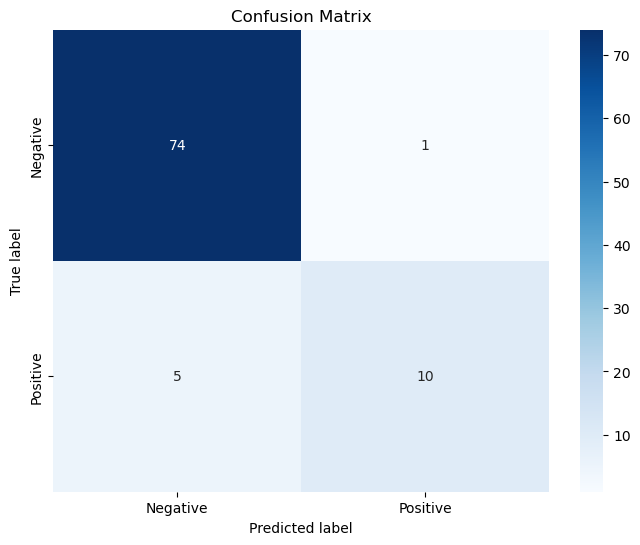

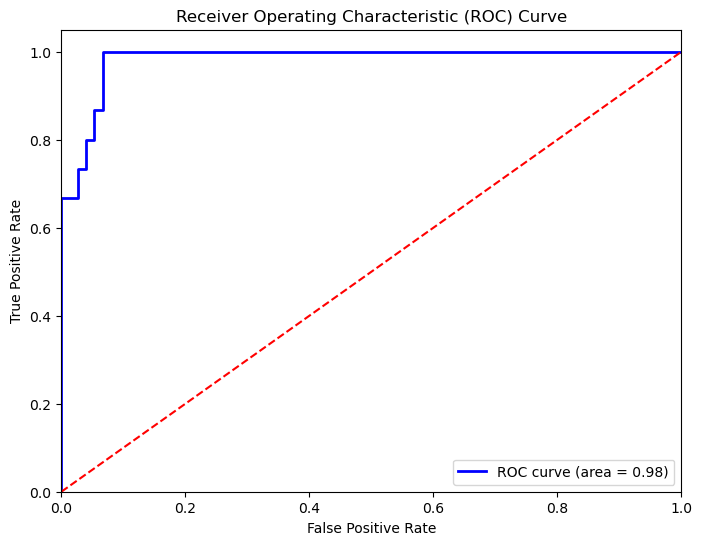

In [141]:
#随机森林

# 假设 combined_df_2 是你已经准备好的数据集
X = combined_df_2.drop(columns='Label')
#X = combined_df_2 #直接变成严格线性了，所以不能这么做！！
y = combined_df_2['Label']

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)#随机级别
model = RandomForestClassifier(
    
    n_estimators=500,#决策人数
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Training Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 计算指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # 存储指标
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    roc_aucs.append(roc_auc)

    # 打印每一折的结果
    print(f"Fold {fold} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}\n")

# 计算平均指标
print("Average Metrics:")
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Evaluating Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Best K value: 1
Fold 1: 0.8333333333333334
Fold 2: 0.8888888888888888
Fold 3: 0.8888888888888888
Fold 4: 1.0
Fold 5: 0.8333333333333334
Mean Accuracy: 0.888888888888889
Accuracy:  0.9
Precision:  0.7833333333333333
Recall:  0.5999999999999999
F1 Score:  0.6447619047619046
ROC AUC:  0.7799999999999999


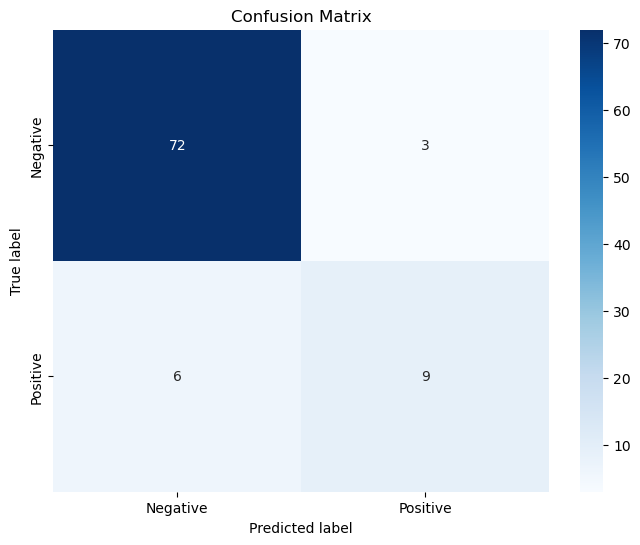

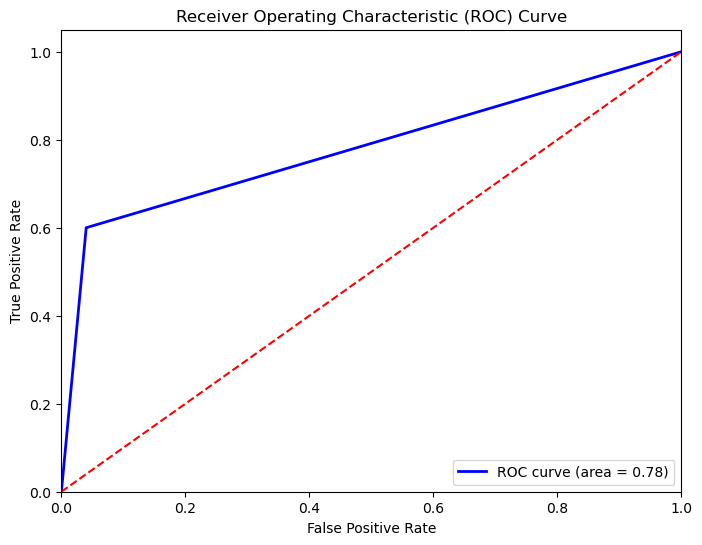

In [143]:
#KNN

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# 假设 combined_df_2 是你已经准备好的数据集
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']

# 创建一个k折交叉验证对象 取5折
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据。KNN算法对于数据的尺度很敏感，因此通常需要进行标准化处理。
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建模型
model = KNeighborsClassifier()
#model = KNeighborsClassifier(n_neighbors=5)

# 使用GridSearchCV来寻找最佳的K值
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 获取最佳K值
best_k = grid_search.best_params_['n_neighbors']
#尝试一下小点的k
#best_k = 1
print(f"Best K value: {best_k}")

# 使用最佳K值创建新模型
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)


#使用交叉验证训练模型并评估性能
scores = cross_val_score(best_model, X, y, cv=kfold)

for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")
print("Mean Accuracy:", scores.mean())

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train_scaled, y_train)
    y_pred_fold = best_model.predict(X_test_scaled)
    y_prob_fold = best_model.predict_proba(X_test_scaled)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)
# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}
Training Fold 1...
Training Fold 2...
Training Fold 3...
Training Fold 4...
Training Fold 5...
Accuracy:  0.9375
Precision:  0.9666666666666668
Recall:  0.8400000000000001
F1 Score:  0.8873737373737374
ROC AUC:  0.9927272727272728
Evaluating Fold 1...
Evaluating Fold 2...
Evaluating Fold 3...
Evaluating Fold 4...
Evaluating Fold 5...


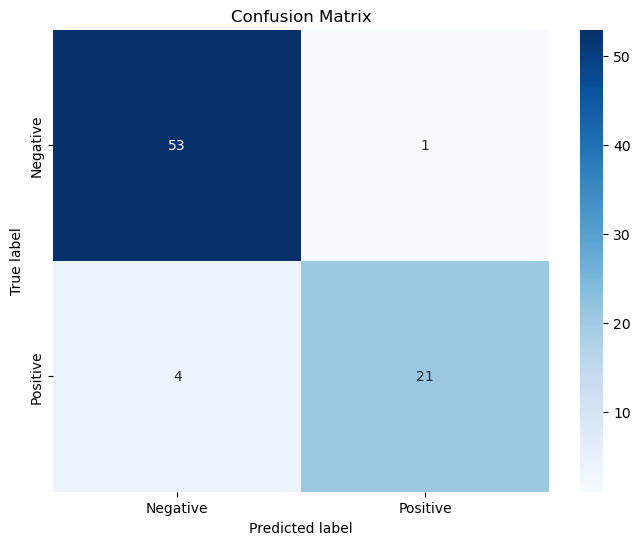

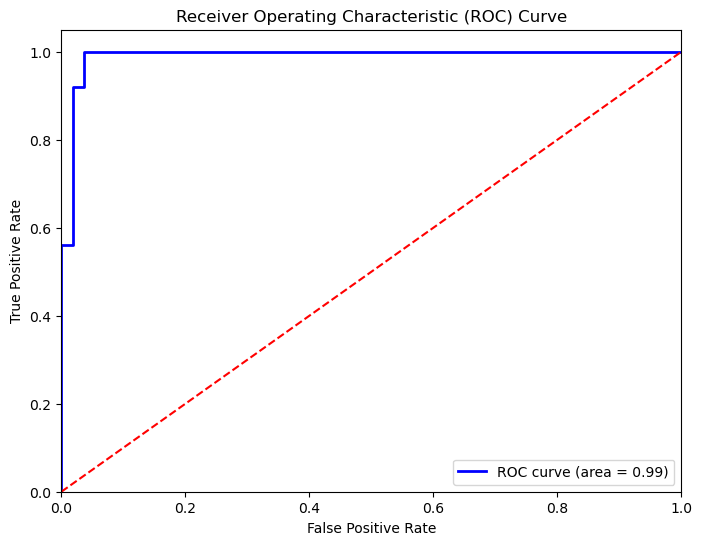

In [123]:
#随机森林搜索参数 时间太长

# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],   #400已测试过效果不好
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# 创建随机森林模型
model = RandomForestClassifier(random_state=42)

# 使用 GridSearchCV 进行参数优化，设置 verbose=2 以显示进程信息
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数重新训练模型
best_model = grid_search.best_estimator_

# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Training Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Evaluating Fold {fold}...")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred_fold = best_model.predict(X_test)
    y_prob_fold = best_model.predict_proba(X_test)[:, 1]

    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy:  0.9333333333333332
Precision:  1.0
Recall:  0.6
F1 Score:  0.72
ROC AUC:  0.9911111111111112


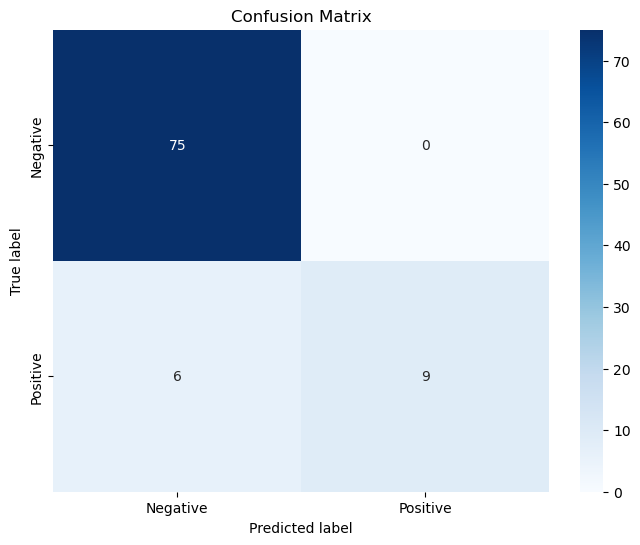

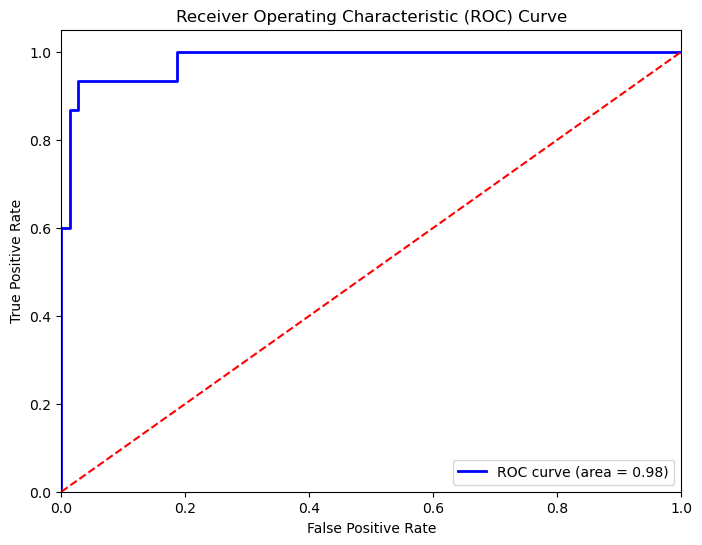

In [145]:
#逻辑回归模型

# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(
    C=100,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [126]:
#逻辑回归 查最优参数
# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 定义参数网格
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# 创建逻辑回归模型
model = LogisticRegression(random_state=42)

# 创建网格搜索对象，设置 verbose=2
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# 拟合数据以查找最佳参数
grid_search.fit(X, y)

# 查看最优参数和得分
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 使用最优参数训练模型（如果需要）
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.885


D:\Softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:  0.8222222222222222
Precision:  0.5733333333333334
Recall:  0.39999999999999997
F1 Score:  0.44333333333333336
ROC AUC:  0.6533333333333332


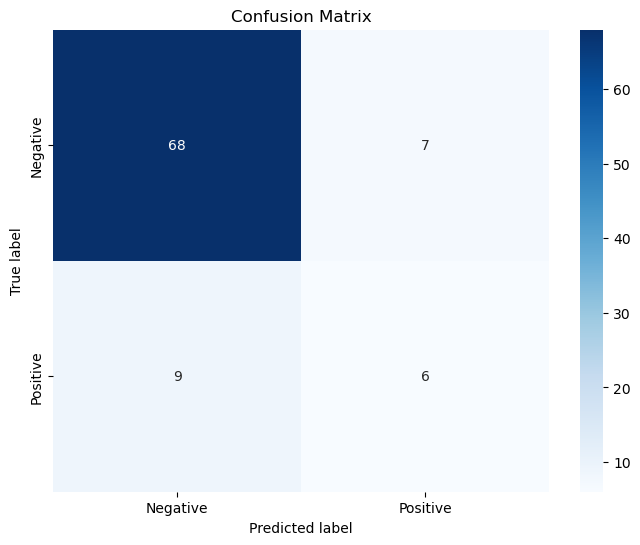

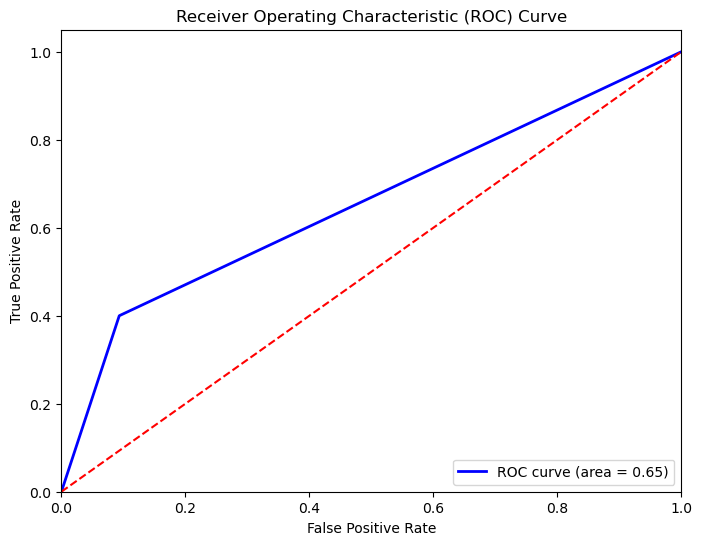

In [147]:
#AdaBoost 模型

# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    learning_rate=20,
    n_estimators=500,
    algorithm='SAMME',  # 使用 SAMME 算法
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [128]:
#AdaBoost搜索参数
# 假设 full_df_color 是你已经准备好的数据集
X = full_df_color.drop(columns='Label')
y = full_df_color['Label']

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# 创建模型
model = AdaBoostClassifier(algorithm='SAMME', random_state=42)

# 创建 GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# 进行参数搜索
grid_search.fit(X, y)

# 输出最佳参数
print("Best Parameters: ", grid_search.best_params_)

NameError: name 'full_df_color' is not defined

Accuracy:  0.9222222222222223
Precision:  0.9333333333333332
Recall:  0.5999999999999999
F1 Score:  0.7133333333333333
ROC AUC:  0.9111111111111111


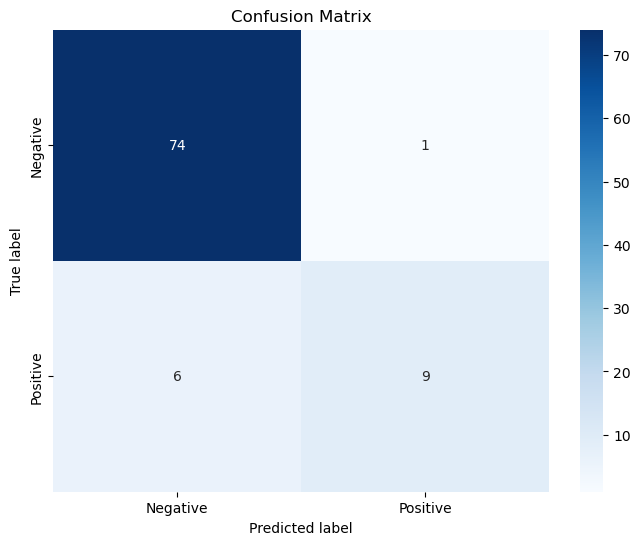

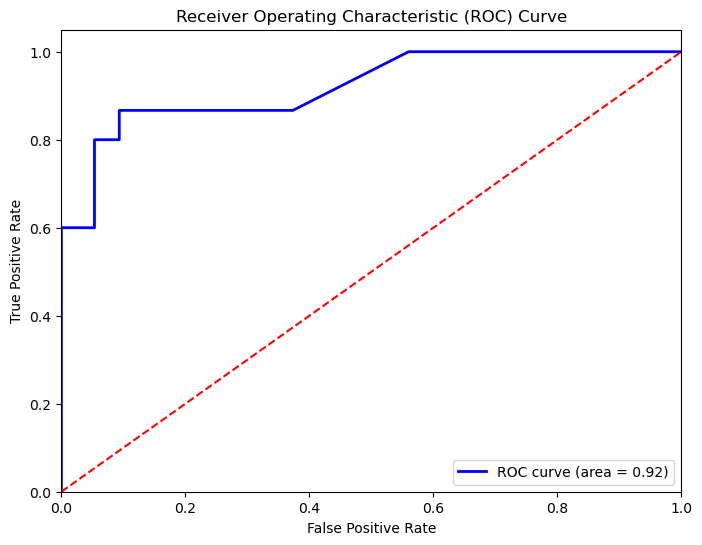

In [149]:
#梯度提升分类器

# 假设 full_df_color 是你已经准备好的数据集
#X = full_df_color.drop(columns='Label')
#y = full_df_color['Label']
X = combined_df_2.drop(columns='Label')
X.fillna(0, inplace=True)
y = combined_df_2['Label']
# 五折交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=150,
    random_state=42
)

# 存储指标
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

# 存储最终的真实值和预测值
y_true = []
y_pred = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred_fold = model.predict(X_test)
    y_prob_fold = model.predict_proba(X_test)[:, 1]

    # 计算指标
    accuracies.append(accuracy_score(y_test, y_pred_fold))
    precisions.append(precision_score(y_test, y_pred_fold))
    recalls.append(recall_score(y_test, y_pred_fold))
    f1s.append(f1_score(y_test, y_pred_fold))
    roc_aucs.append(roc_auc_score(y_test, y_prob_fold))

    # 存储真实值和预测值
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    y_prob.extend(y_prob_fold)

# 计算平均指标
print("Accuracy: ", np.mean(accuracies))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1s))
print("ROC AUC: ", np.mean(roc_aucs))

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [74]:
import os
import shutil


# 定义两个源文件夹路径
negative_folder = r'Y:\生物医学信号处理\project\depression recognition_final\bindata\negative1'
positive_folder = r'Y:\生物医学信号处理\project\depression recognition_final\bindata\positive1'

# 目标文件夹所在的上级目录路径
target_parent_folder = r'Y:\生物医学信号处理\project\depression recognition_final\bindata'

# 处理单个文件夹下文件的函数
def process_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.bin'):
                file_path = os.path.join(root, file)
                file_name_without_extension = os.path.splitext(file)[0]
                new_folder_name = file_name_without_extension.replace('-', '')
                new_folder_path = os.path.join(target_parent_folder, new_folder_name)
                if not os.path.exists(new_folder_path):
                    os.mkdir(new_folder_path)
                shutil.move(file_path, os.path.join(new_folder_path, file))


# 分别处理两个文件夹
process_folder(negative_folder)
process_folder(positive_folder)